In [1]:
from es_sfgtools.workflows.preprocess_ingest.data_handler import DataHandler
from es_sfgtools.data_mgmt.directorymgmt.handler import DirectoryHandler
from pathlib import Path
from datetime import datetime

/Users/franklyndunbar/micromamba/envs/seafloor_geodesy_mac/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from es_sfgtools.sonardyne_tools.sv3_operations import dfop00_to_shotdata
from es_sfgtools.logging import ProcessLogger
ProcessLogger.route_to_console()

In [3]:
DEFAULT_CONFIG = {
    # GeoLab environment settings
    "WORKING_ENVIRONMENT": "GEOLAB",
    "MAIN_DIRECTORY_GEOLAB": "/Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo",
    "S3_SYNC_BUCKET": "seafloor-public-bucket-bucket83908e77-gprctmuztrim",
}
import os

for key, value in DEFAULT_CONFIG.items():
    os.environ[key] = value

from es_sfgtools.config.env_config import Environment

# This will read the environment variables set above
Environment.load_working_environment()

from es_sfgtools.workflows.workflow_handler import WorkflowHandler

In [4]:
# GARPOS filtering configuration
FILTER_CONFIG = {
    "pride_residuals": {
        "enabled": False,
        "max_residual_mm": 8,
        "description": "Filter based on GNSS positioning residuals",
    },
    "max_distance_from_center": {
        "enabled": True,
        "max_distance_m": 150.0,
        "description": "Filter shots beyond maximum distance from array center",
    },
    "ping_replies": {
        "enabled": False,
        "min_replies": 1,
        "description": "Filter based on minimum acoustic ping replies",
    },
    "acoustic_filters": {
        "enabled": True,
        "level": "OK",
        "description": "Apply standard acoustic data quality filters",
    },
}

NETWORK = "cascadia-gorda"
CAMPAIGN = "2025_A_1126"
STATIONS = ["NTH1", "NCC1", "NBR1", "GCC1"]

workflow = WorkflowHandler()


In [6]:

# for station in STATIONS:
#     workflow.set_network_station_campaign(
#         network_id=NETWORK,
#         station_id=station,
#         campaign_id=CAMPAIGN,
#     )
    # workflow.midprocess_prep_garpos(
    #     custom_filters=FILTER_CONFIG, override=False, write_intermediate=False
    # )

In [7]:
STATION = "NCC1"
workflow.set_network_station_campaign(
    network_id=NETWORK,
    station_id=STATION,
    campaign_id=CAMPAIGN,
)
mid_process = workflow.midprocess_get_processor()

mid_process.set_survey(CAMPAIGN+"_3")

shotdata_path = mid_process.current_survey_dir.shotdata
print(f"Shotdata path: {shotdata_path}")


Changed working station to cascadia-gorda NCC1 2025_A_1126


Shotdata path: /Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo/cascadia-gorda/NCC1/2025_A_1126/2025_A_1126_3/2025_A_1126_3_movearound_shotdata.csv


In [8]:
import pandas as pd
shotdata_df = pd.read_csv(shotdata_path)
print(shotdata_df.transponderID.unique())

['IR5209' 'IR5210' 'IR5211']


In [9]:
fivetwonine = shotdata_df[shotdata_df.transponderID == "IR5209"]
fivetwoten = shotdata_df[shotdata_df.transponderID == "IR5210"]
fivetwoelvn = shotdata_df[shotdata_df.transponderID == "IR5211"]
print(f"IR5209 count: {len(fivetwonine)}")
print(f"IR5210 count: {len(fivetwoten)}")
print(f"IR5211 count: {len(fivetwoelvn)}")

IR5209 count: 2791
IR5210 count: 2789
IR5211 count: 2791


Running GARPOS model. Run ID: Test
Running GARPOS model for survey 2025_A_1126_3. Run ID: Test
Running GARPOS model for survey 2025_A_1126_3. Run ID: Test
Iteration 1 of 2 for survey 2025_A_1126_3
Running GARPOS model for NCC1, . Run ID: 0


  suffix  lamb0  lgrad  mu_t  mu_m
0     _0    1.0    0.1   0.0   0.5
Inversion loop 001, RMS(TT) =  15.401263 ms, used_shot =  96.9%, reject =  197, Max(dX) =    10.0000, Hgt =   -992.693
Inversion loop 002, RMS(TT) =   6.003407 ms, used_shot =  94.6%, reject =  345, Max(dX) =    10.0000, Hgt =  -1002.693
Inversion loop 003, RMS(TT) =   0.614132 ms, used_shot =  92.3%, reject =  491, Max(dX) =     6.4332, Hgt =  -1009.126
Inversion loop 004, RMS(TT) =   0.564784 ms, used_shot =  88.8%, reject =  708, Max(dX) =     4.3542, Hgt =  -1009.201
Inversion loop 005, RMS(TT) =   0.526705 ms, used_shot =  85.9%, reject =  896, Max(dX) =     4.4099, Hgt =  -1009.281
Inversion loop 006, RMS(TT) =   0.499261 ms, used_shot =  83.5%, reject = 1049, Max(dX) =     2.0679, Hgt =  -1009.378
Inversion loop 007, RMS(TT) =   0.478240 ms, used_shot =  81.5%, reject = 1176, Max(dX) =     2.1578, Hgt =  -1009.471
Inversion loop 008, RMS(TT) =   0.460530 ms, used_shot =  79.4%, reject = 1308, Max(dX) =     1.3

Iteration 2 of 2 for survey 2025_A_1126_3
Running GARPOS model for NCC1, . Run ID: 1


Inversion loop 010, RMS(TT) =   0.423062 ms, used_shot =  75.4%, reject = 1561, Max(dX) =     2.7098, Hgt =  -1009.621
 ABIC =       51281.630327  misfit =  1.390 _0
/Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo/cascadia-gorda/NCC1/2025_A_1126/2025_A_1126_3/GARPOS/results/run_Test/NCC1.2025_A_1126_0-res.dat
  suffix  lamb0  lgrad  mu_t  mu_m
0     _1    1.0    0.1   0.0   0.5
Inversion loop 001, RMS(TT) =  14.578991 ms, used_shot =  70.7%, reject = 1859, Max(dX) =    10.0000, Hgt =   -992.693
Inversion loop 002, RMS(TT) =   5.866358 ms, used_shot =  69.6%, reject = 1930, Max(dX) =    10.0000, Hgt =  -1002.693
Inversion loop 003, RMS(TT) =   0.399952 ms, used_shot =  72.6%, reject = 1742, Max(dX) =     6.8696, Hgt =  -1009.563
Inversion loop 004, RMS(TT) =   0.382080 ms, used_shot =  70.8%, reject = 1855, Max(dX) =     1.9859, Hgt =  -1009.584
Inversion loop 005, RMS(TT) =   0.363975 ms, used_shot =  68.7%, reject = 1985, Max(dX) =     1.1578, Hgt =  -1009.589
Inversion loop 006

Processing GARPOS results


Inversion loop 010, RMS(TT) =   0.259698 ms, used_shot =  57.4%, reject = 2703, Max(dX) =     1.8552, Hgt =  -1009.634
 ABIC =       34710.613939  misfit =  0.549 _1
/Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo/cascadia-gorda/NCC1/2025_A_1126/2025_A_1126_3/GARPOS/results/run_Test/NCC1.2025_A_1126_1-res.dat


GARPOS results processed, returning results tuple
Skipping plotting for survey 2025_A_1126_1: No .dat files found in run directory /Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo/cascadia-gorda/NCC1/2025_A_1126/2025_A_1126_1/GARPOS/results/run_Test.
Skipping plotting for survey 2025_A_1126_2: Run directory /Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo/cascadia-gorda/NCC1/2025_A_1126/2025_A_1126_2/GARPOS/results/run_Test does not exist.
Using data file /Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo/cascadia-gorda/NCC1/2025_A_1126/2025_A_1126_3/GARPOS/results/run_Test/NCC1.2025_A_1126_1-res.dat for plotting.
Saving figure to /Volumes/DunbarSSD/Project/SeafloorGeodesy/GEOLABDemo/cascadia-gorda/NCC1/2025_A_1126/2025_A_1126_3/GARPOS/results/run_Test/_Test_results.png


Array Final Position: East 115.2898 m, North 136.0632 m, Up -1036.5757 m
 Sig East 0.01 m  Sig North 0.02 m  Sig Up 0.02 m 
Array Delta Position :  East 0.092 m, North 1.790 m, Up -26.941 m 
TSP M5209 : East 706.830 m, North -171.413 m, Up -980.985 m 
TSP M5210 : East -729.648 m, North -57.528 m, Up -987.050 m 
TSP M5211 : East 368.137 m, North 626.390 m, Up -980.043 m 



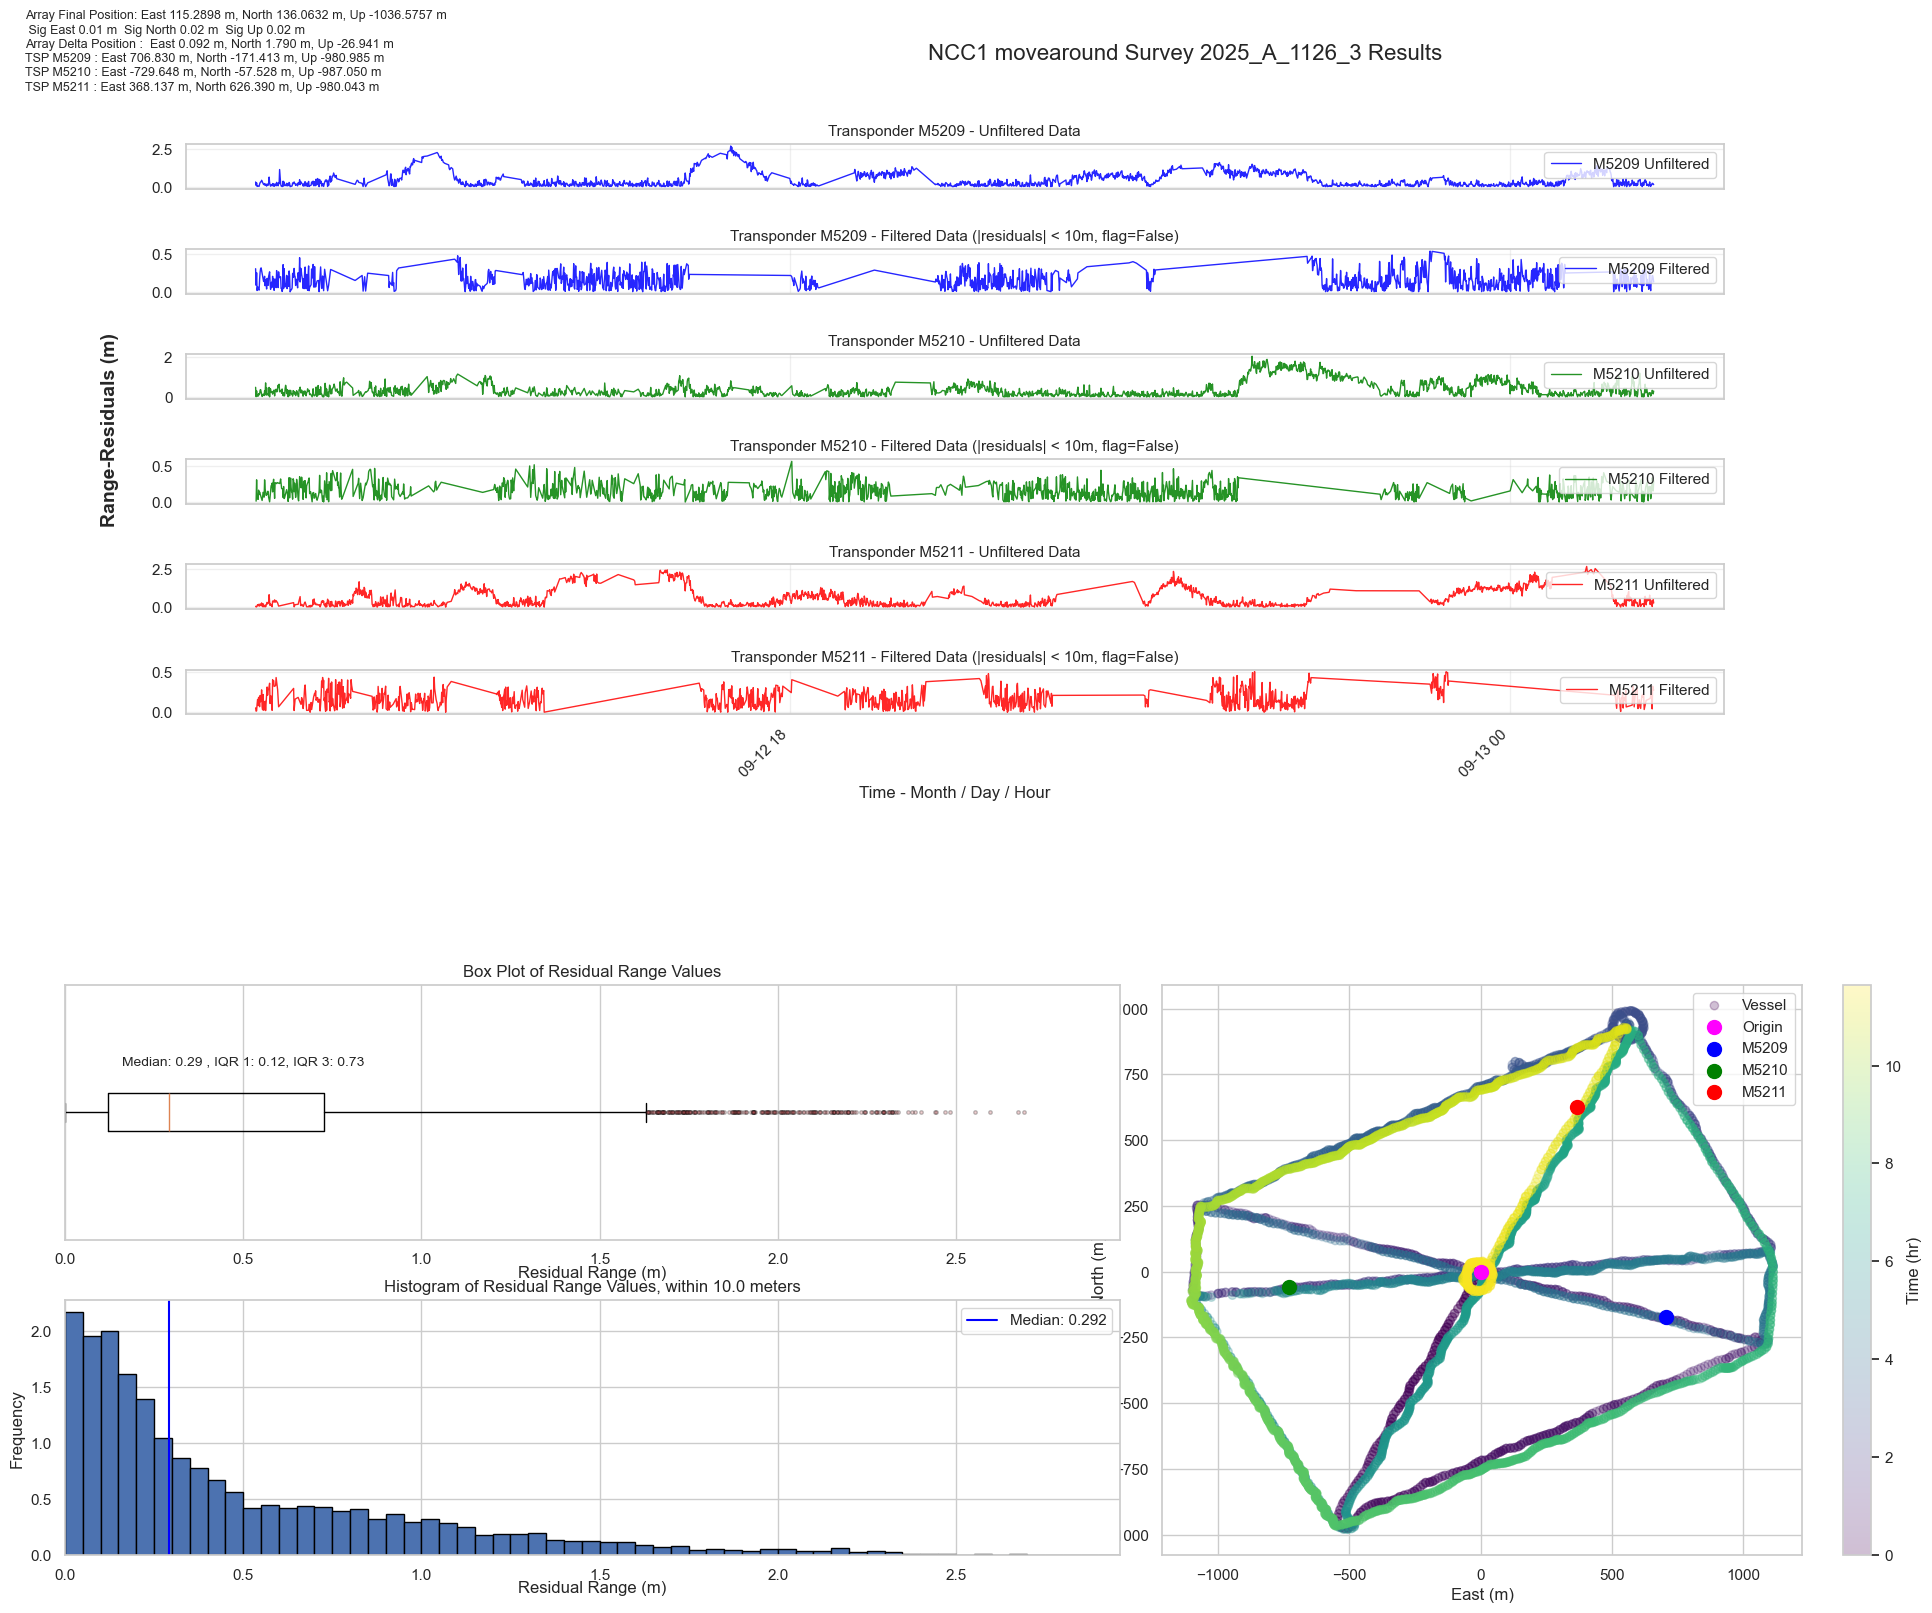

In [ ]:
workflow.modeling_run_garpos(survey_id=CAMPAIGN+"_3", iterations=2, custom_settings={"inversion_params":{"maxloop":30}})
workflow.modeling_plot_garpos_results()